# ANOVA для беты  

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multitest import fdrcorrection
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
from bioinfokit.analys import stat
from scipy.stats import ttest_rel

# ANOVA для кондишена с тремя уровнями (Targeting, Probing, Self Paced)

Используются данные из table_for_anova.csv   

Для этого использовался скрипт: 

/home/vtretyakova/Рабочий стол/ANOVA_for_extrem/table_for_ANOVA.py (В текущей версии есть изменения, но суть та же)

In [2]:
# load data file
d = pd.read_csv(r"/home/vera/MNE/ANOVA/table_for_anova_hemisphere_short_int.csv")
d.tail(10)

,Subject,Condition,Hand,Hemisphere,Minimum_beta,Maximum_beta
274,L019,self_pased,left,ipsilateral,-0.261534,0.869477
275,L020,self_pased,left,ipsilateral,-5.793184,-0.572137
276,L021,self_pased,left,ipsilateral,-0.280809,1.244223
277,L022,self_pased,left,ipsilateral,-3.976470,-1.142184
278,L023,self_pased,left,ipsilateral,-1.920863,0.502556
279,L024,self_pased,left,ipsilateral,0.245915,-0.951387
280,L025,self_pased,left,ipsilateral,-3.310223,0.036865
281,L026,self_pased,left,ipsilateral,-1.851566,0.849769
282,L027,self_pased,left,ipsilateral,-3.804128,4.076597
283,L028,self_pased,left,ipsilateral,-0.783858,0.824081


###### Строим Boxplot для трех условий

In [3]:
my_pal = {Hand: "r" if Hand == "right" else "b" for Hand in d.Hand.unique()}

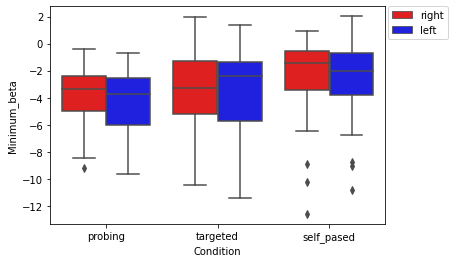

In [4]:
sns.boxplot(x="Condition", y="Minimum_beta", hue="Hand", data=d, palette=my_pal)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.savefig("/home/vera/MNE/ANOVA/boxplot/boxplot_three_cond_minimum.jpeg", format='jpeg',dpi=300)

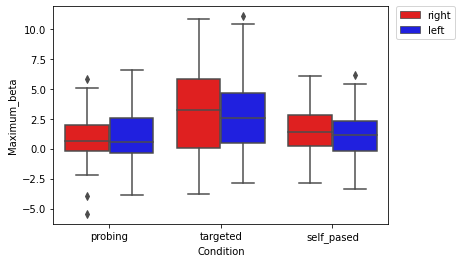

In [5]:
sns.boxplot(x="Condition", y="Maximum_beta", hue="Hand", data=d, palette=my_pal)
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)
plt.savefig("/home/vera/MNE/ANOVA/boxplot/boxplot_three_cond_maximum.jpeg", format='jpeg',dpi=300)

### Друая цветовая палитра 

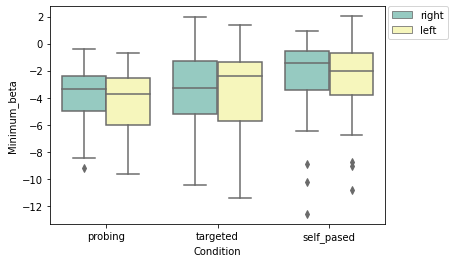

In [30]:
sns.boxplot(x="Condition", y="Minimum_beta", hue="Hand", data=d, palette="Set3")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.savefig("/home/vera/MNE/ANOVA/boxplot/boxplot_three_cond_minimum_short_int.jpeg", format='jpeg',dpi=300)

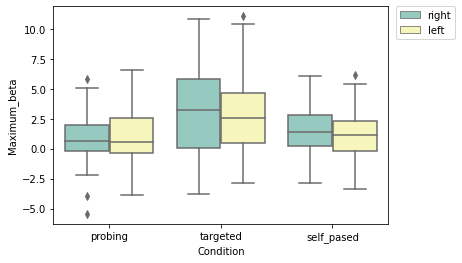

In [34]:
sns.boxplot(x="Condition", y="Maximum_beta", hue="Hand", data=d, palette="Set3")
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)
plt.savefig("/home/vera/MNE/ANOVA/boxplot/boxplot_three_cond_maximum_short_int.jpeg", format='jpeg',dpi=300)

###### Строим модель и проводим дисперсионный анализ (для не связанных выборок, поскольку у нас разные испытуемые)

In [6]:
model = ols('Minimum_beta ~ C(Condition) + C(Hand) + C(Condition):C(Hand)', data=d).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Condition),127.767336,2.0,9.135483,0.000144
C(Hand),5.958411,1.0,0.852064,0.356770
C(Condition):C(Hand),3.068083,2.0,0.219371,0.803163
Residual,1944.030682,278.0,NaN,NaN


In [22]:
model = ols('Maximum_beta ~ C(Condition) + C(Hand) + C(Condition):C(Hand)', data=d).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Condition),161.578040,2.0,11.913934,0.000011
C(Hand),3.456410,1.0,0.509716,0.475861
C(Condition):C(Hand),5.094349,2.0,0.375631,0.687204
Residual,1885.132775,278.0,NaN,NaN


# ANOVA для не связанных выборок с тремя факторами (Рука, полушарие, кондишен)

In [35]:
# load data file
d = pd.read_csv(r"/home/vera/MNE/ANOVA/table_for_anova_hemisphere_short_int.csv")
d.tail(10)

,Subject,Condition,Hand,Hemisphere,Minimum_beta,Maximum_beta
274,L019,self_pased,left,ipsilateral,-0.261534,0.869477
275,L020,self_pased,left,ipsilateral,-5.793184,-0.572137
276,L021,self_pased,left,ipsilateral,-0.280809,1.244223
277,L022,self_pased,left,ipsilateral,-3.976470,-1.142184
278,L023,self_pased,left,ipsilateral,-1.920863,0.502556
279,L024,self_pased,left,ipsilateral,0.245915,-0.951387
280,L025,self_pased,left,ipsilateral,-3.310223,0.036865
281,L026,self_pased,left,ipsilateral,-1.851566,0.849769
282,L027,self_pased,left,ipsilateral,-3.804128,4.076597
283,L028,self_pased,left,ipsilateral,-0.783858,0.824081


# Box plot for Minimum

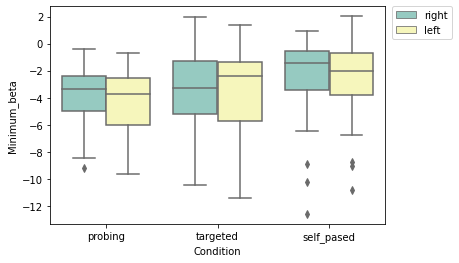

In [37]:
my_pal = {Hand: "r" if Hand == "right" else "b" for Hand in d.Hand.unique()}
sns.boxplot(x="Condition", y="Minimum_beta", hue="Hand", data=d, palette="Set3")
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)

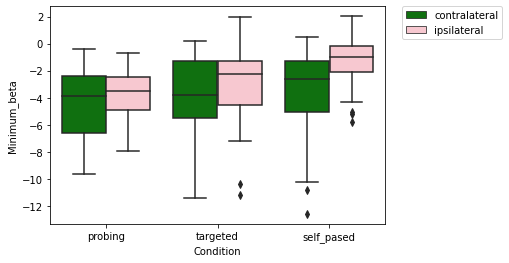

In [38]:
my_pal2 = {Hemisphere: "pink" if Hemisphere == "ipsilateral" else "g" for Hemisphere in d.Hemisphere.unique()}
sns.boxplot(x="Condition", y="Minimum_beta", hue="Hemisphere", data=d, palette=my_pal2)
plt.legend(bbox_to_anchor=(1.35, 1),borderaxespad=0)

# Box plot for Maximum

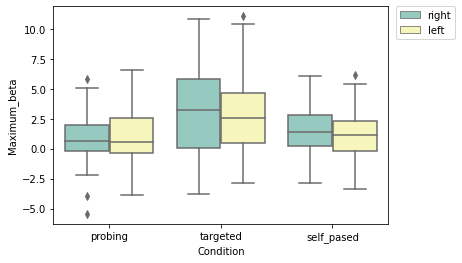

In [39]:
my_pal = {Hand: "r" if Hand == "right" else "b" for Hand in d.Hand.unique()}
sns.boxplot(x="Condition", y="Maximum_beta", hue="Hand", data=d, palette="Set3")
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)
#plt.savefig("/home/vera/MNE/ANOVA/boxplot/boxplot_three_cond_maximum.jpeg", format='jpeg',dpi=300)

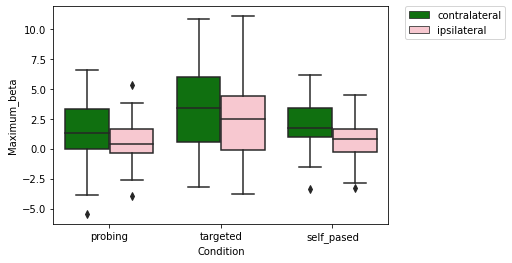

In [40]:
my_pal2 = {Hemisphere: "pink" if Hemisphere == "ipsilateral" else "g" for Hemisphere in d.Hemisphere.unique()}
sns.boxplot(x="Condition", y="Maximum_beta", hue="Hemisphere", data=d, palette=my_pal2)
plt.legend(bbox_to_anchor=(1.35, 1),borderaxespad=0)

In [ ]:
my_pal = {Hand: "r" if Hand == "right" else "b" for Hand in d.Hand.unique()}
sns.boxplot(x="Condition", y="Minimum_beta", hue=["Hand", "Hemisphere"], data=d, palette=my_pal)
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)

# 12 boxplots на одном графике  

для этого добавляем столбец Hand_plot, где вместо двух значений переменной (rigth, left)  у нас становиться 4: 'right_contra', 'right_ipsi', 'left_contra', 'left_ipsi'

In [40]:
# load data file
d = pd.read_csv(r"/home/vera/MNE/ANOVA/table_for_anova_hand_hemisphere_short_int_15_25.csv")
d.tail(10)

,Subject,Condition,Hand,Hand_plot,Hemisphere,Minimum_beta,Maximum_beta
274,L019,self_pased,left,left_ipsi,ipsilateral,-0.272454,1.388322
275,L020,self_pased,left,left_ipsi,ipsilateral,-6.399214,-0.650498
276,L021,self_pased,left,left_ipsi,ipsilateral,-0.604941,1.255961
277,L022,self_pased,left,left_ipsi,ipsilateral,-4.298187,-1.629899
278,L023,self_pased,left,left_ipsi,ipsilateral,-2.001247,0.349934
279,L024,self_pased,left,left_ipsi,ipsilateral,0.160153,-1.187363
280,L025,self_pased,left,left_ipsi,ipsilateral,-3.545760,0.110992
281,L026,self_pased,left,left_ipsi,ipsilateral,-1.960129,0.966159
282,L027,self_pased,left,left_ipsi,ipsilateral,-3.923899,4.577562
283,L028,self_pased,left,left_ipsi,ipsilateral,-0.855986,0.780489


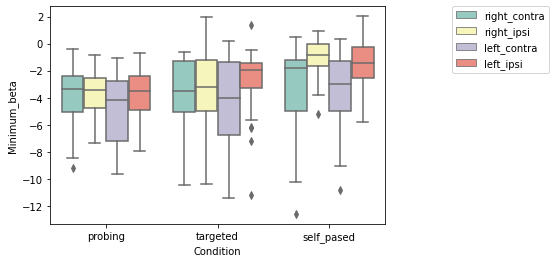

In [53]:
#my_pal = {Hand: "r" if Hand == "right" else "b" for Hand in d.Hand.unique()}
sns.boxplot(x="Condition", y="Minimum_beta", hue="Hand_plot", data=d, palette="Set3")
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)

###  задаем необходимые нам цвета

In [35]:
hands = d.Hand_plot.unique().tolist()
hands


['right_contra', 'right_ipsi', 'left_contra', 'left_ipsi']

In [36]:
# Hex code for each continents color
hands_colors=["magenta", "pink", "skyblue", "green"]

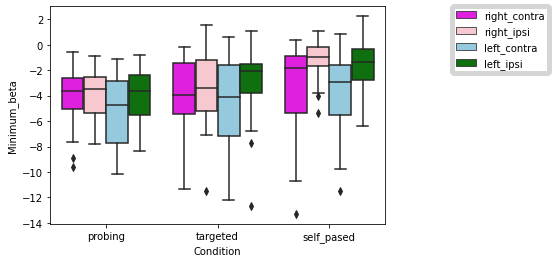

In [41]:
color_dict = dict(zip(hands, hands_colors))
sns.boxplot(x="Condition", y="Minimum_beta", hue="Hand_plot", data=d, palette=color_dict)
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)
plt.savefig("/home/vera/MNE/ANOVA/boxplot/boxplot_three_cond_minimum_hand_hemisphere_short_int_15_25.jpeg", format='jpeg',dpi=300)

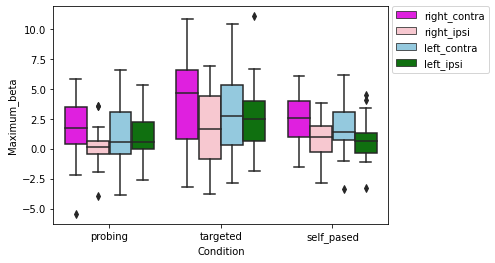

In [19]:
sns.boxplot(x="Condition", y="Maximum_beta", hue="Hand_plot", data=d, palette=color_dict)
plt.legend(bbox_to_anchor=(1.3, 1),borderaxespad=0)
plt.savefig("/home/vera/MNE/ANOVA/boxplot/boxplot_three_cond_maximum_hand_hemisphere_short_int.jpeg", format='jpeg',dpi=300)

# Другой вид графика для тех же данных  - Bar plots

https://pythonbasics.org/seaborn-barplot/  
https://seaborn.pydata.org/generated/seaborn.barplot.html

Text(0, 0.5, 'Beta')

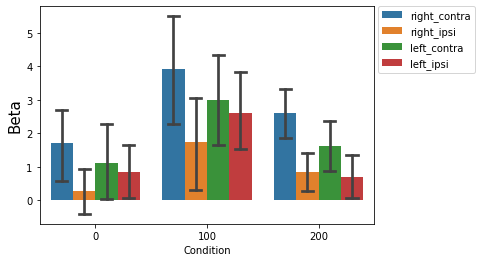

In [21]:
# Если вместо среднего хотим задать другую меру центральной тенденции, то явно указываем estimator=median (см. примеры по ссылкам)
# По умолчанию, показан 95% доверительный интервал (+/- 1.96SE, где SE стандартная ошибка среднего)
color_dict = dict(zip(hands, hands_colors))

fig = sns.barplot(x="Condition", y="Maximum_beta", hue="Hand_plot", data=d, capsize=.1)

plt.legend(bbox_to_anchor=(1.3, 1),borderaxespad=0)
plt.xticks(fig.get_xticks(), fig.get_xticks() * 100)
fig.set_ylabel("Beta", fontsize=15)

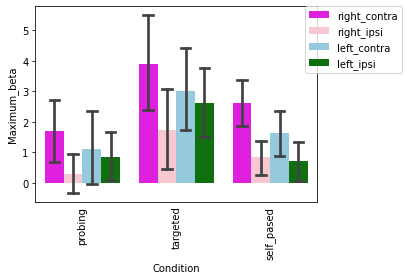

In [26]:
age_plot = sns.barplot(x="Condition", y="Maximum_beta", hue="Hand_plot", data=d, capsize=.1, palette=color_dict)
#age_plot.get_legend().remove()
plt.legend(bbox_to_anchor=(1.3, 1),borderaxespad=0)
plt.setp(age_plot.get_xticklabels(), rotation=90)
#plt.ylim(0, 40)
#age_plot.tick_params(labelsize=14)
age_plot.tick_params(length=0, axis='x')
#plt.bar(width=0.8, bottom=None, align='center', data=None)
#age_plot.set_ylabel("Age", fontsize=15)
#age_plot.set_xlabel("", fontsize=1)
plt.tight_layout()
plt.show()

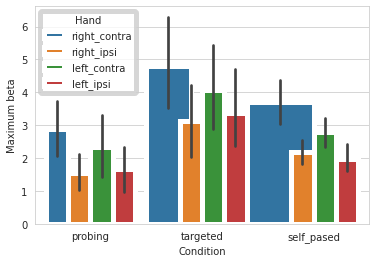

In [23]:
sns.set_style("whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="Condition", y="Maximum_beta", hue="Hand_plot", data=d)

# Set these based on your column counts
columncounts = [20,40,60]

# Maximum bar width is 1. Normalise counts to be in the interval 0-1. Need to supply a maximum possible count here as maxwidth
def normaliseCounts(widths,maxwidth):
    widths = np.array(widths)/float(maxwidth)
    return widths

widthbars = normaliseCounts(columncounts,100)

# Loop over the bars, and adjust the width (and position, to keep the bar centred)
for bar,newwidth in zip(ax.patches,widthbars):
    x = bar.get_x()
    width = bar.get_width()
    centre = x+width/2.

    bar.set_x(centre-newwidth/2.)
    bar.set_width(newwidth)

plt.show()

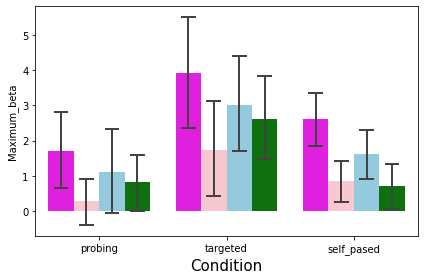

'\nfig = sns.barplot(x="Condition", y="Maximum beta", hue="Hand", data=d, cap\nfig.tick_params(length=0, axis=\'x\')size=.1, palette=color_dict, errwidth = 5)\n\n#plt.xticks(fig.get_xticks(), fig.get_xticks() * 100)\nfig.tick_params(length=0, axis=\'x\')\nplt.xlabel(\'Condition\', fontsize=40)\n\n\nplt.legend(bbox_to_anchor=(1.3, 1),borderaxespad=0)\n'

In [31]:
fig = sns.barplot(data=d, x="Condition", y="Maximum_beta", hue="Hand_plot", capsize=.1, palette=color_dict, errwidth = 2)
fig.get_legend().remove()
#plt.setp(fig.get_xticklabels(), rotation=90)
#plt.ylim(0, 40)
#fig.tick_params(labelsize=14)
#fig.tick_params(length=0, axis='x')
plt.xlabel('Condition', fontsize=15)
#fig.set_ylabel("", fontsize=15)
#fig.set_xlabel("Condition", fontsize=1)
plt.tight_layout()
plt.show()

'''
fig = sns.barplot(x="Condition", y="Maximum beta", hue="Hand", data=d, cap
fig.tick_params(length=0, axis='x')size=.1, palette=color_dict, errwidth = 5)

#plt.xticks(fig.get_xticks(), fig.get_xticks() * 100)
fig.tick_params(length=0, axis='x')
plt.xlabel('Condition', fontsize=40)


plt.legend(bbox_to_anchor=(1.3, 1),borderaxespad=0)
'''

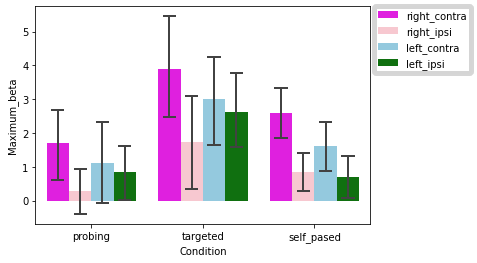

In [32]:
color_dict = dict(zip(hands, hands_colors))

fig = sns.barplot(x="Condition", y="Maximum_beta", hue="Hand_plot", data=d, capsize=.1, palette=color_dict, errwidth = 2)

plt.legend(bbox_to_anchor=(1.3, 1),borderaxespad=0)
#fig.tick_params(length=0, axis='x')

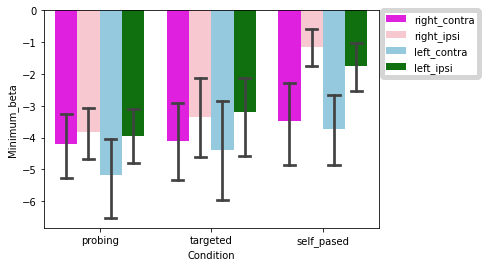

In [43]:
sns.barplot(x="Condition", y="Minimum_beta", hue="Hand_plot", data=d, capsize=.1, palette=color_dict)

plt.legend(bbox_to_anchor=(1.3, 1),borderaxespad=0)
plt.savefig("/home/vera/MNE/ANOVA/barplot/barplot_three_cond_mininum_PreM_hand_hemisphere_15_25.jpeg", format='jpeg',dpi=300)

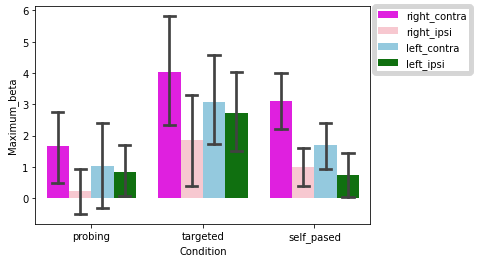

In [44]:
sns.barplot(x="Condition", y="Maximum_beta", hue="Hand_plot", data=d, capsize=.1, palette=color_dict)

plt.legend(bbox_to_anchor=(1.3, 1),borderaxespad=0)
plt.savefig("/home/vera/MNE/ANOVA/barplot/barplot_three_cond_maximum_PostM_hand_hemisphere_15_25.jpeg", format='jpeg',dpi=300)

# !!!!!  
typ=2  
https://stats.stackexchange.com/questions/345684/which-one-to-choose-type-i-type-ii-or-type-iii-anova   

In a balanced design, all three of these model types will yield the same results. With unbalanced data, you will get different results for the main effects but not the interaction term, assuming you only have a two-way interaction (as in your example). The general advice is to use a Type II sums-of-squares model for unbalanced designs. This model tests the main effects without the interaction term. The difference comes down to how you weight each mean or cell of the factorial. In a Type III model, each cell of the factorial gets the same weight (even if some have smaller sample sizes). In a Type II model, each observation gets the same weight. In most situations (but not all!) the latter is more defensible.

If you are only interested in the interaction, then this decision doesn't matter. The sum-of-squares for the interaction will be the same for all three model types.

I just checked and your design is balanced. As such you can use Type III SS. Built-in R functions will work just fine here.

# Minimums

In [14]:
model = ols('Minimum_beta ~ C(Condition) + C(Hand) + C(Hemisphere) + C(Condition):C(Hand) + C(Hemisphere):C(Hand) + C(Condition):C(Hemisphere)', data=d).fit()
# typ=2, Type 2 Anova DataFrame, see above
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Condition),102.175002,2.0,6.801191,0.001308
C(Hand),2.592954,1.0,0.345196,0.557326
C(Hemisphere),47.240753,1.0,6.289080,0.012723
C(Condition):C(Hand),1.890505,2.0,0.125840,0.881807
C(Hemisphere):C(Hand),20.987516,1.0,2.794032,0.095749
C(Condition):C(Hemisphere),11.746944,2.0,0.781925,0.458535
Residual,2073.188296,276.0,NaN,NaN


# Критерий Тьюки

In [26]:
res = stat()
res.tukey_hsd(df=d, res_var='Minimum_beta', xfac_var='Condition', anova_model= 'Minimum_beta ~ C(Condition) + C(Hand) + C(Hemisphere) + C(Condition):C(Hand) + C(Hemisphere):C(Hand) + C(Condition):C(Hemisphere)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,probing,targeted,0.565208,-0.408473,1.538889,1.934571,0.360193
1,probing,self_pased,1.421862,0.498147,2.345577,5.129944,0.001000
2,targeted,self_pased,0.856654,-0.067061,1.780369,3.090727,0.075542


# Maximum

In [18]:
model = ols('Maximum_beta ~ C(Condition) + C(Hand) + C(Hemisphere) + C(Condition):C(Hand) + C(Hemisphere):C(Hand) + C(Condition):C(Hemisphere)', data=d).fit()
# typ= 2, Type 2 Anova DataFrame, see above
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Condition),139.373280,2.0,15.196809,5.480911e-07
C(Hand),8.965128,1.0,1.955057,1.631655e-01
C(Hemisphere),89.537765,1.0,19.525813,1.427432e-05
C(Condition):C(Hand),1.925460,2.0,0.209946,8.107574e-01
C(Hemisphere):C(Hand),10.978714,1.0,2.394167,1.229345e-01
C(Condition):C(Hemisphere),0.463041,2.0,0.050489,9.507736e-01
Residual,1265.628401,276.0,NaN,NaN


# Критерий Тьюки (ANOVA с тремя факторами)

In [28]:
res = stat()
res.tukey_hsd(df=d, res_var='Maximum_beta', xfac_var='Condition', anova_model= 'Maximum_beta ~ C(Condition) + C(Hand) + C(Hemisphere) + C(Condition):C(Hand) + C(Hemisphere):C(Hand) + C(Condition):C(Hemisphere)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,probing,targeted,1.737297,0.976532,2.498062,7.610566,0.00100
1,probing,self_pased,0.553821,-0.167904,1.275546,2.557355,0.16895
2,targeted,self_pased,1.183476,0.461751,1.905201,5.464885,0.00100


# Двухфакторная ANOVA для кондишена с двумя уровнями (Targeting, Probing)

In [11]:
d2 = d[d['Condition'] != 'self_pased']
d2.tail(10)

,Condition,Hand,Minimum_beta,Maximum_beta
78,targeted,left,-5.160903,1.898086
79,targeted,left,-1.982809,5.565144
80,targeted,left,-10.380881,0.849678
81,targeted,left,-4.328391,6.024862
82,targeted,left,-7.810778,1.602543
83,targeted,left,-3.616617,2.831747
84,targeted,left,-7.287090,1.465117
85,targeted,left,-3.795074,9.475308
86,targeted,left,-2.757010,6.391339
87,targeted,left,-4.810514,5.693317


###### Boxplots для двух условий

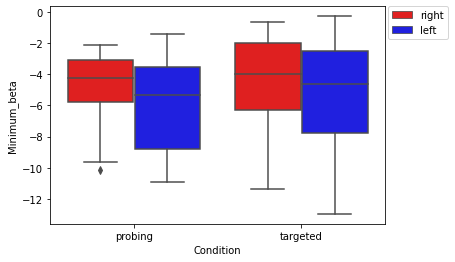

In [12]:
my_pal = {Hand: "r" if Hand == "right" else "b" for Hand in d2.Hand.unique()}
sns.boxplot(x="Condition", y="Minimum_beta", hue="Hand", data=d2, palette=my_pal)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.savefig("/home/vera/MNE/ANOVA/boxplot/boxplot_two_cond_minimum.jpeg", format='jpeg',dpi=300)

<AxesSubplot:xlabel='Condition', ylabel='Minimum_beta'>

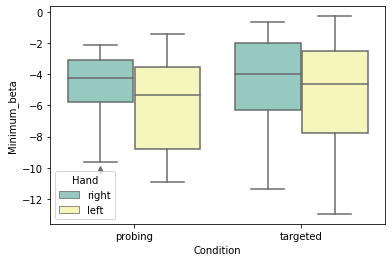

In [6]:
sns.boxplot(x="Condition", y="Minimum_beta", hue="Hand", data=d2, palette="Set3")

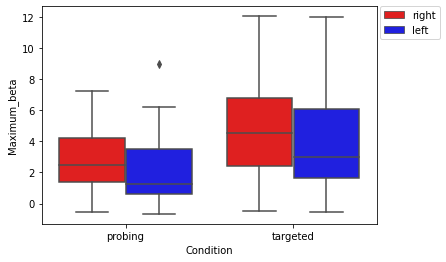

In [13]:
my_pal = {Hand: "r" if Hand == "right" else "b" for Hand in d.Hand.unique()} # задаем цвета
sns.boxplot(x="Condition", y="Maximum_beta", hue="Hand", data=d2, palette=my_pal)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.savefig("/home/vera/MNE/ANOVA/boxplot/boxplot_two_cond_maximum.jpeg", format='jpeg',dpi=300)

<AxesSubplot:xlabel='Condition', ylabel='Maximum_beta'>

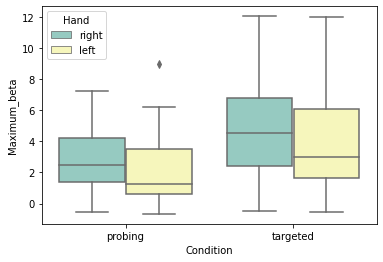

In [7]:
sns.boxplot(x="Condition", y="Maximum_beta", hue="Hand", data=d2, palette="Set3")

In [12]:
model = ols('Minimum_beta ~ C(Condition) + C(Hand) + C(Condition):C(Hand)', data=d2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Condition),7.312325,1.0,0.834360,0.363629
C(Hand),15.942451,1.0,1.819085,0.181047
C(Condition):C(Hand),0.600818,1.0,0.068555,0.794093
Residual,736.175409,84.0,NaN,NaN


In [13]:
model = ols('Maximum_beta ~ C(Condition) + C(Hand) + C(Condition):C(Hand)', data=d2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Condition),73.684950,1.0,9.234732,0.003165
C(Hand),8.951298,1.0,1.121841,0.292558
C(Condition):C(Hand),0.161985,1.0,0.020301,0.887041
Residual,670.245304,84.0,NaN,NaN


# Тест Тьюки для двухфакторной ANOVA

Теперь мы знаем, что различия беты между условиями статистически значимы, но ANOVA не показывает, при каких кондишенах значение беты значительно отличается друг от друга. Чтобы узнать пары значимо различающихся мощностей беты при отпределенных кондишенах, выполним анализ множественных парных сравнений (Post-hoc comparison), используя тест HSD Тьюки.

In [19]:
res = stat()
res.tukey_hsd(df=d, res_var='Maximum_beta', xfac_var='Condition', anova_model='Maximum_beta ~ C(Condition) + C(Hand) + C(Condition):C(Hand)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,probing,targeted,1.830114,0.604550,3.055678,5.004261,0.001587
1,probing,self_pased,0.631892,-0.530780,1.794564,1.821309,0.406027
2,targeted,self_pased,1.198222,0.035549,2.360894,3.453646,0.041763


In [20]:
res = stat()
res.tukey_hsd(df=d2, res_var='Maximum_beta', xfac_var='Condition', anova_model='Maximum_beta ~ C(Condition) + C(Hand) + C(Condition):C(Hand)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,probing,targeted,1.830114,0.632504,3.027724,4.297611,0.003167


# t test для связанных выборок   

Сравниваем beta при Condition: Probing vs Targeted

In [5]:
d2_probing = d2[d2['Condition'] == 'probing']
d2_targeted = d2[d2['Condition'] == 'targeted']

In [7]:
data1 = d2_probing['Maximum_beta']
data2 = d2_targeted['Maximum_beta']

stat, p = ttest_rel(data1, data2)
p = float(p)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=-3.899, p=0.000
Different distributions (reject H0)


#####  Получили значимое отличие между максимумами беты для условий  targeting и probing - p-value = 0.05   
##### Сделаем поправку на множественные сравнения с помощью FDR коррекции

In [9]:
rejected, p_val_fdr = fdrcorrection(p, alpha=0.05, method='indep', is_sorted=False)

##### установили, что отличия все еще значимые, даже после коррекции

In [11]:
p_val_fdr

array([0.00033358])

In [16]:
data1 = d2_probing['Minimum_beta']
data2 = d2_targeted['Minimum_beta']

stat, p = ttest_rel(data1, data2)
p = float(p)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=-1.298, p=0.201
Same distributions (fail to reject H0)


# Repeated measures ANOVA Python   

Сравниваем бету при Condition: Probing vs Targeted (одни и те же испытуемые, т.е. выборки связанные)
https://www.marsja.se/repeated-measures-anova-in-python-using-statsmodels/  

https://python.cogsci.nl/numerical/statistics/ 

Сначала убираем строки для Self paced

In [2]:
# load data file
#Загружаем данные для Repeated measured ANOVA (добавлен столбец с именами испытуемых)
d = pd.read_csv(r"/home/vera/MNE/ANOVA/table_for_anovaRM.csv")
d.tail(10)

,Subject,Condition,Hand,Minimum beta,Maximum beta
133,L019,self_pased,left,-2.264036,1.671180
134,L020,self_pased,left,-10.009629,1.220419
135,L021,self_pased,left,-2.395103,2.580837
136,L022,self_pased,left,-4.061008,2.879128
137,L023,self_pased,left,-3.125089,1.594101
138,L024,self_pased,left,-6.561952,2.634952
139,L025,self_pased,left,-5.808643,3.358962
140,L026,self_pased,left,-7.064633,3.368875
141,L027,self_pased,left,-11.551385,3.668236
142,L028,self_pased,left,-1.985082,2.911335


In [45]:
#Убираем self paced 
d2 = d[d['Condition'] != 'self_pased']
d2.tail(10)

,Subject,Condition,Hand,Hand_plot,Hemisphere,Minimum_beta,Maximum_beta
166,372_skju,targeted,left,left_ipsi,ipsilateral,-1.990643,2.997278
167,389_revi,targeted,left,left_ipsi,ipsilateral,-1.479908,0.920347
168,390_shko,targeted,left,left_ipsi,ipsilateral,-7.701120,2.637394
169,394_tiev,targeted,left,left_ipsi,ipsilateral,-2.780813,7.611649
170,402_maev,targeted,left,left_ipsi,ipsilateral,-1.871072,2.478529
171,406_bial,targeted,left,left_ipsi,ipsilateral,-1.844060,-0.971474
172,409_kodm,targeted,left,left_ipsi,ipsilateral,-6.781586,0.695304
173,415_yael,targeted,left,left_ipsi,ipsilateral,-1.948997,4.006037
174,436_buni,targeted,left,left_ipsi,ipsilateral,-2.166477,4.728154
175,383_laan,targeted,left,left_ipsi,ipsilateral,-1.650198,4.869488


если хотим убрать фактор полушария, то надо удалить повторяющиеся значения для Hand

In [46]:
############### MINIMUM THREE FACTORS #####################

aovrm3way = AnovaRM(d2, 'Minimum_beta', 'Subject', within=['Condition', 'Hand', 'Hemisphere'])
res3way = aovrm3way.fit()

print(res3way)

                         Anova
                          F Value Num DF  Den DF Pr > F
-------------------------------------------------------
Condition                  0.8682 1.0000 21.0000 0.3620
Hand                       2.2484 1.0000 21.0000 0.1486
Hemisphere                15.0356 1.0000 21.0000 0.0009
Condition:Hand             0.8427 1.0000 21.0000 0.3690
Condition:Hemisphere       0.1355 1.0000 21.0000 0.7165
Hand:Hemisphere            2.1982 1.0000 21.0000 0.1530
Condition:Hand:Hemisphere  0.2358 1.0000 21.0000 0.6322



In [47]:
############### MAXIMUM THREE FACTORS #####################

aovrm3way = AnovaRM(d2, 'Maximum_beta', 'Subject', within=['Condition', 'Hand', 'Hemisphere'])
res3way = aovrm3way.fit()

print(res3way)

                         Anova
                          F Value Num DF  Den DF Pr > F
-------------------------------------------------------
Condition                 16.1633 1.0000 21.0000 0.0006
Hand                       0.0061 1.0000 21.0000 0.9385
Hemisphere                17.3808 1.0000 21.0000 0.0004
Condition:Hand             0.0008 1.0000 21.0000 0.9784
Condition:Hemisphere       1.2993 1.0000 21.0000 0.2672
Hand:Hemisphere            9.9374 1.0000 21.0000 0.0048
Condition:Hand:Hemisphere  0.4640 1.0000 21.0000 0.5032



# Выбираем испытуемых 1, 2, 3, 4, 6, 9, 12, 13, 15, 16, 18, 20, 21

In [48]:
subjects_list = [ 
    '030_koal',
    '051_vlro',
    '128_godz',
    '136_spar',
    '176_nama',
    '202_skol',
    '211_gnlu',
    '277_trev',
    '307_firo',
    '308_lodm',
    '317_arel',
    '355_slya',
    '372_skju',
    '389_revi',
    '390_shko',
    '394_tiev',
    '402_maev',
    '406_bial',
    '409_kodm',
    '415_yael',
    '436_buni',
    '383_laan']

len(subjects_list)

22

In [49]:
# получаем из номеров испытуемых индексы
a = [1, 2, 3, 4, 6, 9, 12, 13, 15, 16, 18, 20, 21]
ind = [x - 1 for x in a]
ind


[0, 1, 2, 3, 5, 8, 11, 12, 14, 15, 17, 19, 20]

In [51]:
subj_short = []
for i, subj in enumerate(subjects_list):
    if i in ind:
        subj_short.append(subj)

In [52]:
len(subj_short)

13

In [53]:
d4 = d.loc[d['Subject'].isin(subj_short)]

d4.shape

(104, 7)

In [54]:
d2.shape

(176, 7)

In [55]:
############### MINIMUM THREE FACTORS #####################

aovrm3way = AnovaRM(d4, 'Minimum_beta', 'Subject', within=['Condition', 'Hand', 'Hemisphere'])
res3way = aovrm3way.fit()

print(res3way)

                         Anova
                          F Value Num DF  Den DF Pr > F
-------------------------------------------------------
Condition                  0.4674 1.0000 12.0000 0.5072
Hand                       1.6561 1.0000 12.0000 0.2224
Hemisphere                 6.9329 1.0000 12.0000 0.0219
Condition:Hand             1.2478 1.0000 12.0000 0.2858
Condition:Hemisphere       0.7364 1.0000 12.0000 0.4076
Hand:Hemisphere            0.0042 1.0000 12.0000 0.9495
Condition:Hand:Hemisphere  0.3390 1.0000 12.0000 0.5712



In [56]:
############### MAXIMUM THREE FACTORS #####################

aovrm3way = AnovaRM(d4, 'Maximum_beta', 'Subject', within=['Condition', 'Hand', 'Hemisphere'])
res3way = aovrm3way.fit()

print(res3way)

                         Anova
                          F Value Num DF  Den DF Pr > F
-------------------------------------------------------
Condition                  9.3132 1.0000 12.0000 0.0101
Hand                       0.2991 1.0000 12.0000 0.5944
Hemisphere                12.3690 1.0000 12.0000 0.0042
Condition:Hand             0.0008 1.0000 12.0000 0.9775
Condition:Hemisphere       0.0004 1.0000 12.0000 0.9848
Hand:Hemisphere            5.4793 1.0000 12.0000 0.0373
Condition:Hand:Hemisphere  2.9966 1.0000 12.0000 0.1090



# Self pased, factors: hand, Hemisphere

In [34]:
# load data file
d = pd.read_csv(r"/home/vera/MNE/ANOVA/table_for_anova_hands_hemisphere_short_int.csv")
d.tail(10)

,Subject,Condition,Hand,Hand_plot,Hemisphere,Minimum_beta,Maximum_beta
274,L019,self_pased,left,left_ipsi,ipsilateral,-0.261534,0.869477
275,L020,self_pased,left,left_ipsi,ipsilateral,-5.793184,-0.572137
276,L021,self_pased,left,left_ipsi,ipsilateral,-0.280809,1.244223
277,L022,self_pased,left,left_ipsi,ipsilateral,-3.976470,-1.142184
278,L023,self_pased,left,left_ipsi,ipsilateral,-1.920863,0.502556
279,L024,self_pased,left,left_ipsi,ipsilateral,0.245915,-0.951387
280,L025,self_pased,left,left_ipsi,ipsilateral,-3.310223,0.036865
281,L026,self_pased,left,left_ipsi,ipsilateral,-1.851566,0.849769
282,L027,self_pased,left,left_ipsi,ipsilateral,-3.804128,4.076597
283,L028,self_pased,left,left_ipsi,ipsilateral,-0.783858,0.824081


In [57]:
#Оставляем только self paced 
d3 = d[d['Condition'] == 'self_pased']
d3.tail(10)

,Subject,Condition,Hand,Hand_plot,Hemisphere,Minimum_beta,Maximum_beta
274,L019,self_pased,left,left_ipsi,ipsilateral,-0.272454,1.388322
275,L020,self_pased,left,left_ipsi,ipsilateral,-6.399214,-0.650498
276,L021,self_pased,left,left_ipsi,ipsilateral,-0.604941,1.255961
277,L022,self_pased,left,left_ipsi,ipsilateral,-4.298187,-1.629899
278,L023,self_pased,left,left_ipsi,ipsilateral,-2.001247,0.349934
279,L024,self_pased,left,left_ipsi,ipsilateral,0.160153,-1.187363
280,L025,self_pased,left,left_ipsi,ipsilateral,-3.545760,0.110992
281,L026,self_pased,left,left_ipsi,ipsilateral,-1.960129,0.966159
282,L027,self_pased,left,left_ipsi,ipsilateral,-3.923899,4.577562
283,L028,self_pased,left,left_ipsi,ipsilateral,-0.855986,0.780489


In [58]:
############### MINIMUM #####################

aovrm2way = AnovaRM(d3, 'Minimum_beta', 'Subject', within=['Hand', 'Hemisphere'])
res2way = aovrm2way.fit()

print(res2way)

                    Anova
                F Value Num DF  Den DF Pr > F
---------------------------------------------
Hand             0.9314 1.0000 26.0000 0.3434
Hemisphere      35.8080 1.0000 26.0000 0.0000
Hand:Hemisphere  0.3328 1.0000 26.0000 0.5690



In [59]:
############### MAXIMUM #####################

aovrm2way = AnovaRM(d3, 'Maximum_beta', 'Subject', within=['Hand', 'Hemisphere'])
res2way = aovrm2way.fit()

print(res2way)

                    Anova
                F Value Num DF  Den DF Pr > F
---------------------------------------------
Hand             3.7520 1.0000 26.0000 0.0637
Hemisphere      23.5003 1.0000 26.0000 0.0001
Hand:Hemisphere  4.5352 1.0000 26.0000 0.0428



# Good luck with your analysis ;)